# Analysis of Spotify Chart

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize

In [2]:
#import dataframe
file_name = "spotify_utf.csv"
df_data = pd.read_csv(file_name)
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928/9/25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [64]:
#clean up the data
df_data_clear = df_data.drop(columns=['id','release_date','mode'])
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear.duplicated().sum()

45

In [65]:
df_data_clear = df_data_clear[~df_data_clear.duplicated()==1]
df_data_clear.shape

(134183, 16)

In [4]:
pip install texthero

Note: you may need to restart the kernel to use updated packages.


In [10]:
#text_preprocessing
import texthero as hero
custom_pipeline = [hero.preprocessing.remove_stopwords,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_digits,
                   hero.preprocessing.remove_punctuation
                   ]
df_data_clear['name'] = df_data_clear['name'].pipe(hero.clean, custom_pipeline)

In [60]:
from pandas import Series, DataFrame
deleteset = ['feat','remaster','remastered','live','version','remix','soundtrack','la','da','op','de','el','mix','acoustic']
newdict = {}
for key, value in df_data_clear['name'].to_dict().items():
  newdict[key] = (' '.join([word for word in value.split() if word not in deleteset]))
newseries = Series(newdict)

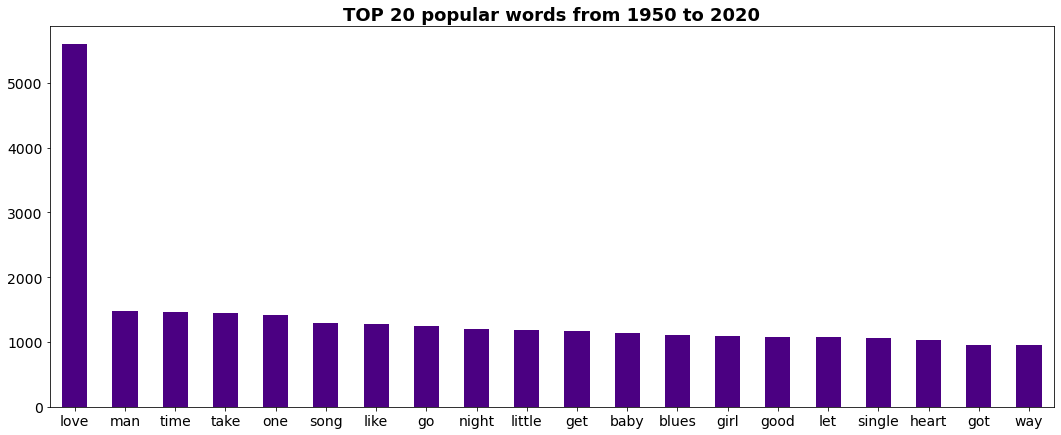

In [61]:
#TOP 30 popular words from 1950-2020
import matplotlib.pyplot as plt
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(newseries).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=0,color="#4B0082",title="TOP 20 popular words from 1950 to 2020",figsize=(18,7),fontsize=14);
plt.title('TOP 20 popular words from 1950 to 2020', fontsize =18,weight='bold')
plt.show(block=True)

<Figure size 1152x648 with 0 Axes>

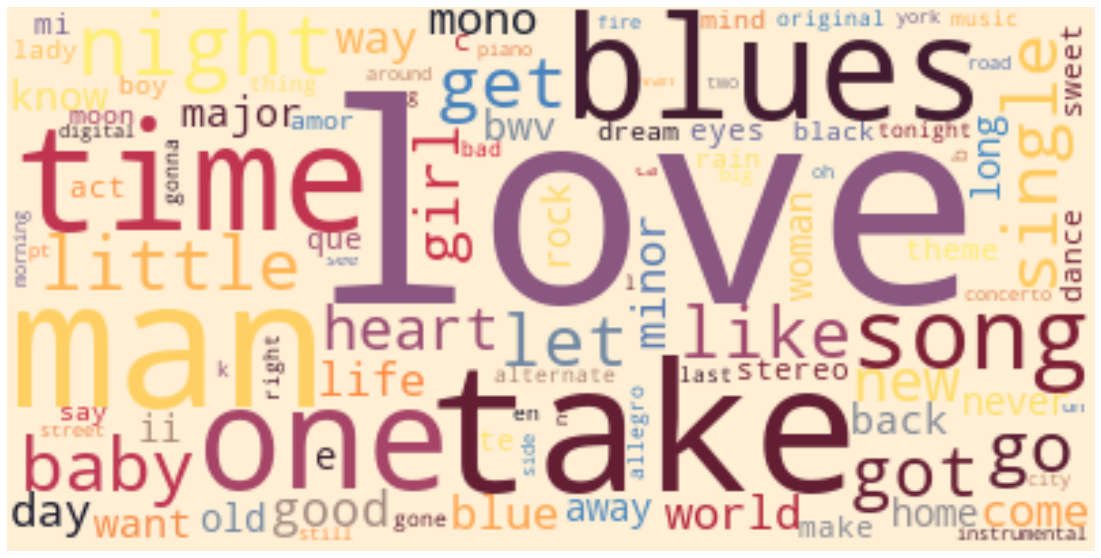

<Figure size 1152x648 with 0 Axes>

In [62]:
#TOP 100 popular words from 1950 to 2000
df_data_clear['name'] = newseries
from1950_wordcloud = hero.wordcloud(df_data_clear.loc[list(df_data_clear.year <= 2000), 'name'], max_words=100)
plt.figure(figsize = (16,9))

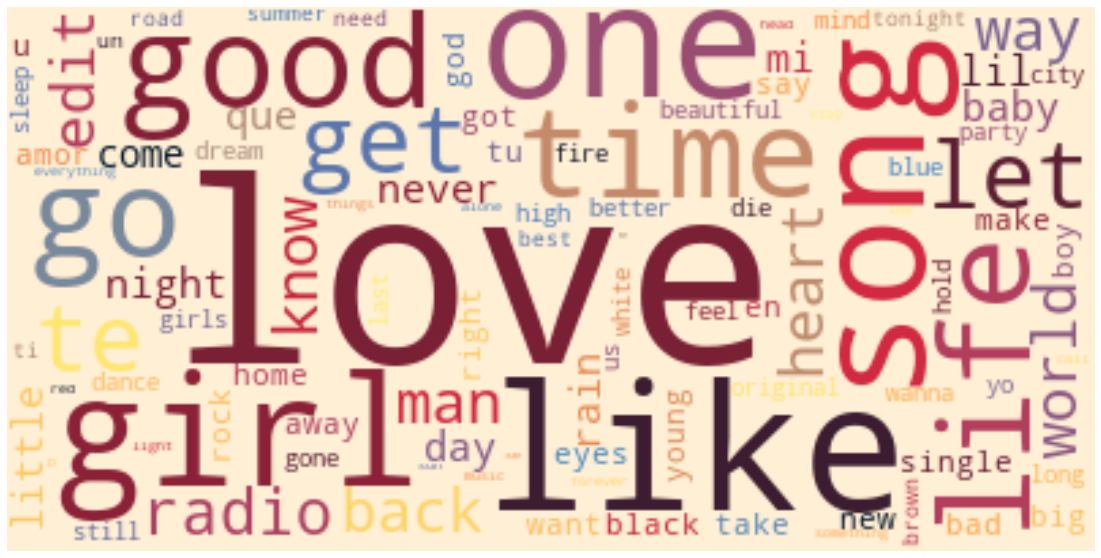

In [63]:
#TOP 100 popular words from 2000 to 2020
df_data_clear['name'] = newseries
hero.wordcloud(df_data_clear.loc[list(df_data_clear.year >= 2000), 'name'], max_words=100)